In [3]:
import pandas as pd
# For this notebook, we are going to analyze data (both weather and power) from 2018 

# Weather Data (Vars: Cloud, Dew, Wind Dir, Wind Speed, & Temp)
cloud_2018_df = pd.read_csv('~/Documents/ECE Next/WeatherOPF/2007_cloud.csv', encoding='EUC-KR')
dew_2018_df = pd.read_csv('~/Documents/ECE Next/WeatherOPF/2007_dew.csv', encoding='EUC-KR')
wind_dir_2018_df = pd.read_csv('~/Documents/ECE Next/WeatherOPF/2007_dir.csv', encoding='EUC-KR')
wind_speed_2018_df = pd.read_csv('~/Documents/ECE Next/WeatherOPF/2007_speed.csv', encoding='EUC-KR')
temp_2018_df = pd.read_csv('~/Documents/ECE Next/WeatherOPF/2007_temp.csv', encoding='EUC-KR')

# Power Data (Vars: Voltage & Limit)
voltage_2018_df = pd.read_csv('~/Documents/ECE Next/ElectricityOPF/2018v.csv', encoding='EUC-KR')
limit_2018_df = pd.read_csv('~/Documents/ECE Next/ElectricityOPF/2018l.csv', encoding='EUC-KR')

# Our constructed of valid weather stations that we'll reference from
our_tx_weather_stations_df = pd.read_csv('~/Documents/ECE Next/ExtraData/our_tx_weather_stations.csv')

/tmp/ipykernel_4647/2457366966.py:5: DtypeWarning: Columns (14,20,25,27,29,31,32,33,34,35,36,38,39,41,43,47,49,90,94,124,188,206,240,262,308,400,401,404,407,409,412,413,414,417,418,422,426,427,429,431,432,433,435,436,437,438,440,441,442,443,444,447,452,454,455,458,459,460,462,463,466,467,468,469,470,472,474,475,477,479,480,483,484,491,494,495,497,499,500,501,503,504,507,508,511,512,513,514,515,518,520,522,523,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,547,548,550,551,552,554,555,558,561,563,564,568,569,570,571,573,574,576,577,578,579,580,581,582,583,585,586,587,590,591,593,594,595,596,597,598,600,602,603,604,605,606,607,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,628,629,631,632,634,635,636,637,638,650,658,660,661,662,664,665,666,668,669,671,672,675,676,679,680,681,684,685,686,687,688,690,692,693,694,695,729,760,767,768,769,770,772,773,774,775,776,777,779,780,787,788,789,790,791,793,794,795,796,797,799,800,801,802,803,805

## Explore Weather Data
---


# Weather and Bus (I/O) Visual Data Analysis
---
The purpose of this notebook is to create data visualizations (time series graphs) to see how weather input variables affect the output variables from our buses. We will start off small by picking one specific year from weather and power databases.

"When analyzing data from a power grid, voltage values provide information about the actual voltage levels measured at various points in the system. These voltage values can be compared against the specified limits to assess if the grid is operating within the desired range or if any voltage violations have occurred.

By monitoring voltage levels and enforcing limits, grid operators can take appropriate actions to maintain system stability, reduce the risk of equipment damage, and ensure a reliable power supply to consumers."

In [7]:
print("Cloud DF's Shape: {}".format(cloud_2018_df.shape))
cloud_2018_df

Cloud DF's Shape: (8760, 5602)


,Date,Hour,TimeDomainWeatherMeasCount:4,TimeDomainWeatherMeasCount:9,TimeDomainAuxFileSave,TimeDomainWeatherSummary:12,TimeDomainWeatherSummary:13,TimeDomainWeatherSummary:14,TimeDomainWeatherCloudCover:1,TimeDomainWeatherCloudCover:2,...,TimeDomainWeatherCloudCover:5585,TimeDomainWeatherCloudCover:5586,TimeDomainWeatherCloudCover:5587,TimeDomainWeatherCloudCover:5588,TimeDomainWeatherCloudCover:5589,TimeDomainWeatherCloudCover:5590,TimeDomainWeatherCloudCover:5591,TimeDomainWeatherCloudCover:5592,TimeDomainWeatherCloudCover:5593,TimeDomainWeatherCloudCover:5594
0,2006-12-31,오후 6:00:00,3620,1974,YES,43.17,0.0,80.0,40,No Value,...,40,0,0,80,60,0,0,60,80,80
1,2006-12-31,오후 7:00:00,3105,2489,YES,40.57,0.0,80.0,No Value,No Value,...,0,No Value,80,No Value,40,0,No Value,80,80,No Value
2,2006-12-31,오후 8:00:00,3082,2512,YES,40.23,0.0,80.0,60,No Value,...,0,No Value,80,No Value,60,0,No Value,60,80,No Value
3,2006-12-31,오후 9:00:00,3477,2117,YES,39.36,0.0,80.0,60,No Value,...,40,No Value,80,No Value,80,0,No Value,60,80,No Value
4,2006-12-31,오후 10:00:00,3103,2491,YES,39.45,0.0,80.0,No Value,No Value,...,0,No Value,80,No Value,60,0,No Value,60,80,No Value
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2007-12-31,오후 1:00:00,3453,2141,YES,35.35,0.0,80.0,No Value,No Value,...,No Value,No Value,0,No Value,0,0,No Value,40,0,No Value
8756,2007-12-31,오후 2:00:00,3411,2183,YES,35.22,0.0,80.0,No Value,No Value,...,No Value,No Value,0,No Value,0,0,No Value,40,0,No Value
8757,2007-12-31,오후 3:00:00,3758,1836,YES,34.96,0.0,80.0,No Value,No Value,...,No Value,No Value,0,No Value,0,0,No Value,No Value,0,No Value
8758,2007-12-31,오후 4:00:00,3378,2216,YES,34.65,0.0,80.0,No Value,No Value,...,No Value,No Value,0,No Value,0,0,No Value,40,0,No Value


In [6]:
print("Dew DF's Shape: {}".format(dew_2018_df.shape))
dew_2018_df

Dew DF's Shape: (8760, 5602)


,Date,Time,Num Valid Dew Points,Num Invalid Dew Points,Save Timepoint in Aux File,Dew Point Average,Dew Point Minimum,Dew Point Maximum,AGGH,AGGL,...,ZWSH,ZWTN,ZWWW,ZWYN,ZYCC,ZYHB,ZYQQ,ZYTL,ZYTX,ZYYY
0,2006-12-31,오후 6:00:00,4028,1566,YES,37.73,-58.0,82.0,79,No Value,...,10,5,9,21,16,0,-8,32,21,25
1,2006-12-31,오후 7:00:00,3326,2268,YES,34.19,-58.0,84.0,No Value,No Value,...,9,No Value,5,No Value,16,7,No Value,32,23,No Value
2,2006-12-31,오후 8:00:00,3303,2291,YES,33.89,-58.0,82.0,79,No Value,...,10,No Value,5,No Value,18,10,No Value,34,23,No Value
3,2006-12-31,오후 9:00:00,3726,1868,YES,35.93,-56.0,82.0,79,No Value,...,10,No Value,7,No Value,19,12,No Value,28,23,No Value
4,2006-12-31,오후 10:00:00,3330,2264,YES,33.58,-56.0,82.0,No Value,No Value,...,10,No Value,9,No Value,21,14,No Value,32,25,No Value
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2007-12-31,오후 1:00:00,3651,1943,YES,29.82,-44.0,79.0,No Value,No Value,...,No Value,No Value,-9,No Value,-6,-9,No Value,5,-2,No Value
8756,2007-12-31,오후 2:00:00,3604,1990,YES,29.61,-44.0,79.0,No Value,No Value,...,No Value,No Value,-9,No Value,-6,-13,No Value,5,-2,No Value
8757,2007-12-31,오후 3:00:00,3972,1622,YES,31.02,-42.0,81.0,No Value,No Value,...,No Value,No Value,-8,No Value,-8,-15,No Value,No Value,-6,No Value
8758,2007-12-31,오후 4:00:00,3572,2022,YES,28.77,-44.0,82.0,No Value,No Value,...,No Value,No Value,-8,No Value,-8,-15,No Value,3,-4,No Value


In [8]:
print("Dir DF's Shape: {}".format(wind_dir_2018_df.shape))
wind_dir_2018_df

Dir DF's Shape: (8760, 5599)


,Date,Time,Num Valid Wind Directions,Num Invalid Wind Directions,Save Timepoint in Aux File,AGGH,AGGL,AGGM,AYGA,AYMD,...,ZWSH,ZWTN,ZWWW,ZWYN,ZYCC,ZYHB,ZYQQ,ZYTL,ZYTX,ZYYY
0,2006-12-31,오후 6:00:00,3980,1614,YES,70,No Value,No Value,No Value,0,...,20,250,40,0,200,190,20,320,290,320
1,2006-12-31,오후 7:00:00,3280,2314,YES,No Value,No Value,No Value,No Value,No Value,...,40,No Value,300,No Value,190,180,No Value,300,350,No Value
2,2006-12-31,오후 8:00:00,3254,2340,YES,50,No Value,No Value,No Value,No Value,...,330,No Value,No Value,No Value,0,220,No Value,290,330,No Value
3,2006-12-31,오후 9:00:00,3674,1920,YES,50,No Value,0,No Value,No Value,...,220,No Value,No Value,No Value,220,230,No Value,340,340,No Value
4,2006-12-31,오후 10:00:00,3265,2329,YES,No Value,No Value,No Value,No Value,No Value,...,340,No Value,310,No Value,250,230,No Value,300,340,No Value
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2007-12-31,오후 1:00:00,3557,2037,YES,No Value,No Value,No Value,No Value,No Value,...,No Value,No Value,0,No Value,280,270,No Value,10,270,No Value
8756,2007-12-31,오후 2:00:00,3510,2084,YES,No Value,No Value,No Value,No Value,No Value,...,No Value,No Value,100,No Value,290,260,No Value,10,210,No Value
8757,2007-12-31,오후 3:00:00,3913,1681,YES,No Value,No Value,No Value,No Value,No Value,...,No Value,No Value,No Value,No Value,220,250,No Value,No Value,220,No Value
8758,2007-12-31,오후 4:00:00,3518,2076,YES,No Value,No Value,No Value,No Value,No Value,...,No Value,No Value,0,No Value,280,240,No Value,360,180,No Value


In [6]:
print("Wind Speed DF's Shape: {}".format(wind_speed_2018_df.shape))
wind_speed_2018_df

Wind Speed DF's Shape: (8760, 5813)


,Date,Time,Num Valid Wind Speeds,Num Invalid Wind Speeds,Save Timepoint in Aux File,Wind Speed Average,Wind Speed Minimum,Wind Speed Maximum,AGGH,AGGM,...,ZSSS,ZUCK,ZUGY,ZUUU,ZWSH,ZWWW,ZYCC,ZYHB,ZYTL,ZYTX
0,2017-12-31,오후 6:00:00,4424,1381,YES,8.45,0,169,8,4.5,...,1.0,1,1,1,2.5,1.0,2.5,1,2.5,1.0
1,2017-12-31,오후 7:00:00,4377,1428,YES,8.49,0,61,7,No Value,...,3.5,2.5,2.5,1,2.5,1.0,2.5,2.5,1.0,1.0
2,2017-12-31,오후 8:00:00,4368,1437,YES,8.42,0,69,7,No Value,...,3.5,1,2.5,1,2.5,1.0,4.5,1,2.5,0.0
3,2017-12-31,오후 9:00:00,4375,1430,YES,8.41,0,60,7,7,...,2.5,1,3.5,1,3.5,1.0,4.5,1,2.5,0.0
4,2017-12-31,오후 10:00:00,4395,1410,YES,8.31,0,55,7,3.5,...,2.5,1,4.5,1,2.5,1.0,7,2.5,3.5,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-12-31,오후 1:00:00,3299,2506,YES,10.14,0,49,9,No Value,...,No Value,No Value,No Value,No Value,No Value,No Value,No Value,No Value,No Value,No Value
8756,2018-12-31,오후 2:00:00,3384,2421,YES,10.33,0,51,14,No Value,...,No Value,No Value,No Value,No Value,No Value,No Value,No Value,No Value,No Value,No Value
8757,2018-12-31,오후 3:00:00,3376,2429,YES,10.42,0,47,10.5,No Value,...,No Value,No Value,No Value,No Value,No Value,No Value,No Value,No Value,No Value,No Value
8758,2018-12-31,오후 4:00:00,3377,2428,YES,10.26,0,43,7,No Value,...,No Value,No Value,No Value,No Value,No Value,No Value,No Value,No Value,No Value,No Value


In [10]:
print("Temp DF's Shape: {}".format(temp_2018_df.shape))
temp_2018_df

Temp DF's Shape: (8760, 5602)


,Date,Time,Num Valid Temperatures,Num Invalid Temperatures,Save Timepoint in Aux File,Temperature Average,Temperature Minimum,Temperature Maximum,AGGH,AGGL,...,ZWSH,ZWTN,ZWWW,ZWYN,ZYCC,ZYHB,ZYQQ,ZYTL,ZYTX,ZYYY
0,2006-12-31,오후 6:00:00,4086,1508,YES,44.59,-49.0,129.0,88,No Value,...,19,21,10,23,23,3,-2,32,25,25
1,2006-12-31,오후 7:00:00,3391,2203,YES,40.67,-49.0,100.0,No Value,No Value,...,19,No Value,9,No Value,21,12,No Value,32,25,No Value
2,2006-12-31,오후 8:00:00,3359,2235,YES,40.18,-49.0,102.0,88,No Value,...,19,No Value,9,No Value,25,16,No Value,34,25,No Value
3,2006-12-31,오후 9:00:00,3783,1811,YES,42.42,-47.0,104.0,88,No Value,...,18,No Value,9,No Value,25,18,No Value,34,27,No Value
4,2006-12-31,오후 10:00:00,3388,2206,YES,39.70,-47.0,104.0,No Value,No Value,...,23,No Value,10,No Value,27,21,No Value,34,27,No Value
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2007-12-31,오후 1:00:00,3710,1884,YES,40.90,-36.0,99.0,No Value,No Value,...,No Value,No Value,-4,No Value,1,-6,No Value,25,5,No Value
8756,2007-12-31,오후 2:00:00,3656,1938,YES,41.21,-36.0,97.0,No Value,No Value,...,No Value,No Value,-4,No Value,1,-8,No Value,25,3,No Value
8757,2007-12-31,오후 3:00:00,4034,1560,YES,42.72,-36.0,100.0,No Value,No Value,...,No Value,No Value,-2,No Value,-4,-8,No Value,No Value,0,No Value
8758,2007-12-31,오후 4:00:00,3624,1970,YES,40.18,-36.0,95.0,No Value,No Value,...,No Value,No Value,-4,No Value,0,-9,No Value,25,1,No Value


## Explore Power Data
---

In [11]:
print("voltage DF's Shape: {}".format(voltage_2018_df.shape))
voltage_2018_df

voltage DF's Shape: (8760, 6720)


,Date,Time,Skip,110001 PU Volt,110002 PU Volt,110003 PU Volt,110004 PU Volt,110005 PU Volt,110006 PU Volt,110007 PU Volt,...,270216 PU Volt,270217 PU Volt,270218 PU Volt,270219 PU Volt,270220 PU Volt,270221 PU Volt,270222 PU Volt,270223 PU Volt,270224 PU Volt,270225 PU Volt
0,12/31/2017,6:00:00 PM,NO,1.06,1.06,1.06,1.06,1.04,1.04,1.04,...,1.04,1.04,1.04,1.04,1.04,1.04,1.04,1.04,1.04,1.04
1,12/31/2017,7:00:00 PM,NO,1.06,1.06,1.06,1.06,1.04,1.04,1.04,...,1.04,1.04,1.04,1.04,1.04,1.04,1.04,1.04,1.04,1.03
2,12/31/2017,8:00:00 PM,NO,1.06,1.06,1.06,1.06,1.04,1.04,1.04,...,1.04,1.04,1.04,1.04,1.04,1.04,1.04,1.04,1.04,1.03
3,12/31/2017,9:00:00 PM,NO,1.06,1.06,1.06,1.06,1.04,1.04,1.04,...,1.04,1.04,1.04,1.04,1.04,1.04,1.04,1.04,1.04,1.03
4,12/31/2017,10:00:00 PM,NO,1.06,1.06,1.06,1.06,1.04,1.04,1.04,...,1.04,1.04,1.04,1.04,1.04,1.04,1.04,1.04,1.04,1.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,12/31/2018,1:00:00 PM,NO,1.06,1.06,1.06,1.06,1.04,1.04,1.04,...,1.04,1.04,1.04,1.04,1.04,1.04,1.04,1.04,1.04,1.03
8756,12/31/2018,2:00:00 PM,NO,1.06,1.06,1.06,1.06,1.04,1.04,1.04,...,1.04,1.04,1.04,1.04,1.04,1.04,1.04,1.04,1.04,1.03
8757,12/31/2018,3:00:00 PM,NO,1.06,1.06,1.06,1.06,1.04,1.04,1.04,...,1.04,1.04,1.04,1.04,1.04,1.04,1.04,1.04,1.04,1.03
8758,12/31/2018,4:00:00 PM,NO,1.06,1.06,1.06,1.06,1.04,1.04,1.04,...,1.04,1.04,1.04,1.04,1.04,1.04,1.04,1.04,1.04,1.03


In [12]:
print("Limit DF's Shape: {}".format(limit_2018_df.shape))
limit_2018_df

Limit DF's Shape: (8760, 9143)


,Date,Time,Skip,110001 TO 110004 CKT 1 % of Limit Used,110001 TO 110041 CKT 1 % of Limit Used,110001 TO 110113 CKT 1 % of Limit Used,110001 TO 230292 CKT 1 % of Limit Used,110001 TO 270046 CKT 1 % of Limit Used,110002 TO 110004 CKT 1 % of Limit Used,110003 TO 110004 CKT 1 % of Limit Used,...,270211 TO 270213 CKT 1 % of Limit Used,270211 TO 270214 CKT 1 % of Limit Used,270211 TO 270215 CKT 1 % of Limit Used,270216 TO 270217 CKT 1 % of Limit Used,270216 TO 270218 CKT 1 % of Limit Used,270216 TO 270219 CKT 1 % of Limit Used,270216 TO 270220 CKT 1 % of Limit Used,270216 TO 270221 CKT 1 % of Limit Used,270216 TO 270222 CKT 1 % of Limit Used,270223 TO 270224 CKT 1 % of Limit Used
0,12/31/2017,6:00:00 PM,NO,0,12.86,24.49,18.96,19.79,0,0,...,0,11.94,7.95,15.1,16.56,8.08,16.75,9.87,4.98,0
1,12/31/2017,7:00:00 PM,NO,0,12.73,27.67,20.91,21.47,0,0,...,0,11.70,7.60,15.1,16.56,8.03,16.71,9.82,4.98,0
2,12/31/2017,8:00:00 PM,NO,0,12.50,31.23,23.06,23.31,0,0,...,0,11.42,7.17,15.1,16.56,8.06,16.72,9.85,4.98,0
3,12/31/2017,9:00:00 PM,NO,0,12.40,33.27,24.32,24.37,0,0,...,0,11.23,6.87,15.1,16.56,8.19,16.78,9.95,4.98,0
4,12/31/2017,10:00:00 PM,NO,0,12.58,31.72,23.43,23.60,0,0,...,0,11.36,7.08,15.1,16.56,8.09,16.74,9.87,4.98,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,12/31/2018,1:00:00 PM,NO,0,12.86,13.59,12.05,13.91,0,0,...,0,11.69,7.58,15.1,16.56,8.10,16.76,9.88,4.98,0
8756,12/31/2018,2:00:00 PM,NO,0,12.81,13.14,11.75,13.65,0,0,...,0,11.73,7.64,15.1,16.56,8.12,16.78,9.91,4.98,0
8757,12/31/2018,3:00:00 PM,NO,0,12.77,12.66,11.43,13.37,0,0,...,0,11.68,7.57,15.1,16.56,8.11,16.77,9.89,4.98,0
8758,12/31/2018,4:00:00 PM,NO,0,12.82,12.15,11.15,13.10,0,0,...,0,11.59,7.43,15.1,16.56,8.07,16.75,9.86,4.98,0


## Condense Weather Data
---
The following code will condense our weather dataframes to only contains the columns that contains the weather stations that are needed for this project.

In [17]:
# On all weather dataframes, the first weather station is AGGH
starting_column = "AGGH"
our_weather_station_set = set(our_tx_weather_stations_df['Name'])

# Get the index of the starting column from each weather dataframe
# cloud_start_index = cloud_2018_df.columns.get_loc(starting_column)
dew_start_index = dew_2018_df.columns.get_loc(starting_column)
dir_start_index = wind_dir_2018_df.columns.get_loc(starting_column)
speed_start_index = wind_speed_2018_df.columns.get_loc(starting_column)
temp_start_index = temp_2018_df.columns.get_loc(starting_column)

# Filter all weather dataframes to include the desired columns
# Cloud Data
# columns_to_keep = [col for col in cloud_2018_df.columns if col in our_weather_station_set]
# c_cloud_2018_df = cloud_2018_df.iloc[:, :cloud_start_index].join(cloud_2018_df[columns_to_keep])

# Dew Data
columns_to_keep = [col for col in dew_2018_df.columns if col in our_weather_station_set]
c_dew_2018_df = dew_2018_df.iloc[:, :dew_start_index].join(dew_2018_df[columns_to_keep])

# Wind Directions Data
columns_to_keep = [col for col in wind_dir_2018_df.columns if col in our_weather_station_set]
c_wind_dir_2018_df = wind_dir_2018_df.iloc[:, :dir_start_index].join(wind_dir_2018_df[columns_to_keep])

# Wind Speed Data
columns_to_keep = [col for col in wind_speed_2018_df.columns if col in our_weather_station_set]
c_wind_speed_2018_df = wind_speed_2018_df.iloc[:, :speed_start_index].join(wind_speed_2018_df[columns_to_keep])

# Temp Data
columns_to_keep = [col for col in temp_2018_df.columns if col in our_weather_station_set]
c_temp_2018_df = temp_2018_df.iloc[:, :temp_start_index].join(temp_2018_df[columns_to_keep])

# Check if any weather stations are missing in the new condensed weather dataframes
# cloud_missing_stations = our_weather_station_set - set(c_cloud_2018_df.columns)
dew_missing_stations = our_weather_station_set - set(c_dew_2018_df.columns)
dir_missing_stations = our_weather_station_set - set(c_wind_dir_2018_df.columns)
speed_missing_stations = our_weather_station_set -  set(c_wind_dir_2018_df.columns)
temp_missing_stations = our_weather_station_set - set(c_temp_2018_df.columns)

# if cloud_missing_stations:
#     print("The following weather stations were not found in the condensed cloud dataframe:", cloud_missing_stations)
#     print('That is a total of {} missing weather stations.\n'.format(len(cloud_missing_stations)))
if dew_missing_stations:
    print("The following weather stations were not found in the condensed dew dataframe:", dew_missing_stations)
    print('That is a total of {} missing weather stations.\n'.format(len(dew_missing_stations)))
if dir_missing_stations:
    print("The following weather stations were not found in the condensed dir dataframe:", dir_missing_stations)
    print('That is a total of {} missing weather stations.\n'.format(len(dir_missing_stations)))
if speed_missing_stations:
    print("The following weather stations were not found in the condensed speed dataframe:", speed_missing_stations)
    print('That is a total of {} missing weather stations.\n'.format(len(speed_missing_stations)))
if temp_missing_stations:
    print("The following weather stations were not found in the condensed temp dataframe:", temp_missing_stations)
    print('That is a total of {} missing weather stations.\n'.format(len(temp_missing_stations)))

# Save Weather Data as CSV file
c_dew_2018_df.to_csv('c_dew_2007.csv', index=False)
c_temp_2018_df.to_csv('c_temp_2007.csv', index=False)
c_wind_speed_2018_df.to_csv('c_wind_speed.csv', index=False)


The following weather stations were not found in the condensed dew dataframe: {'KP07', 'K5R5', 'KT56', 'KT02', 'KBRO', 'KGGG', 'KNOG', 'KHGX', 'KFWD', 'K3T1', 'K62H', 'KCRP', 'K3R5', 'KBSM', 'KNBE', 'KF39', 'KELP', 'KT31', 'KAUS', 'KAMA', 'KLUB', 'K4F4', 'KF18', 'KBAZ', 'KE29', 'KGKY', 'KGDP', 'KFWH', 'KGVW', 'KHLR', 'KF54', 'KSPL', 'KLBB'}
That is a total of 33 missing weather stations.

The following weather stations were not found in the condensed dir dataframe: {'KP07', 'K5R5', 'KT56', 'KT02', 'KBRO', 'KGGG', 'KNOG', 'KHGX', 'KFWD', 'K3T1', 'K62H', 'KCRP', 'K3R5', 'KBSM', 'KNBE', 'KF39', 'KELP', 'KT31', 'KAUS', 'KAMA', 'KLUB', 'K4F4', 'KF18', 'KBAZ', 'KE29', 'KGKY', 'KGDP', 'KFWH', 'KGVW', 'KHLR', 'KF54', 'KSPL', 'KLBB'}
That is a total of 33 missing weather stations.

The following weather stations were not found in the condensed speed dataframe: {'KP07', 'K5R5', 'KT56', 'KT02', 'KBRO', 'KGGG', 'KNOG', 'KHGX', 'KFWD', 'K3T1', 'K62H', 'KCRP', 'K3R5', 'KBSM', 'KNBE', 'KF39', 'KELP',

### Explore New Condensed Weather Dataframes
---
>I set **assertions** to double check that we did not loose any rows of data from our original/uncondensed weather dataframes.

In [15]:
assert(c_cloud_2018_df.shape[0] == cloud_2018_df.shape[0])
print("Cloud DF's Shape: {}".format(c_cloud_2018_df.shape))
c_cloud_2018_df.head()

NameError: name 'c_cloud_2018_df' is not defined

In [ ]:
assert(c_dew_2018_df.shape[0] == dew_2018_df.shape[0])
print("Dew DF's Shape: {}".format(c_dew_2018_df.shape))
c_dew_2018_df.head()

Dew DF's Shape: (8760, 150)


,Date,Time,Num Valid Dew Points,Num Invalid Dew Points,Save Timepoint in Aux File,Dew Point Average,Dew Point Minimum,Dew Point Maximum,K11R,K3T5,...,KT65,KT82,KTKI,KTPL,KTRL,KTYR,KUTS,KUVA,KVCT,KXBP
0,2017-12-31,오후 6:00:00,4430,1375,YES,21.07,-51,82,36,32,...,52,25,10,27,12,27,34,32,37,12
1,2017-12-31,오후 7:00:00,4384,1421,YES,20.46,-53,86,34,32,...,50,23,10,25,9,21,30,30,36,14
2,2017-12-31,오후 8:00:00,4372,1433,YES,19.96,-54,82,34,30,...,48,23,9,25,9,19,30,30,34,12
3,2017-12-31,오후 9:00:00,4377,1428,YES,19.81,-56,84,34,30,...,48,23,7,21,9,19,30,30,32,12
4,2017-12-31,오후 10:00:00,4395,1410,YES,19.65,-54,88,32,30,...,46,21,7,21,5,14,30,28,30,9


In [ ]:
assert(c_wind_dir_2018_df.shape[0] == wind_dir_2018_df.shape[0])
print("Wind Direction DF's Shape: {}".format(c_wind_dir_2018_df.shape))
c_wind_dir_2018_df.head()

Wind Direction DF's Shape: (8760, 147)


,Date,Time,Num Valid Wind Directions,Num Invalid Wind Directions,Save Timepoint in Aux File,K11R,K3T5,K6R6,KABI,KACT,...,KT65,KT82,KTKI,KTPL,KTRL,KTYR,KUTS,KUVA,KVCT,KXBP
0,2017-12-31,오후 6:00:00,4258,1547,YES,350,10,30,10,350,...,20,360,360,350,360,10,350,40,360,10
1,2017-12-31,오후 7:00:00,4227,1578,YES,360,10,10,360,350,...,20,10,350,350,10,10,350,40,360,10
2,2017-12-31,오후 8:00:00,4215,1590,YES,360,350,30,10,360,...,20,10,10,350,10,360,340,30,350,10
3,2017-12-31,오후 9:00:00,4234,1571,YES,360,10,30,10,350,...,30,10,10,350,360,10,360,360,360,360
4,2017-12-31,오후 10:00:00,4232,1573,YES,360,360,30,20,360,...,30,10,10,350,10,20,350,10,360,20


In [ ]:
assert(c_wind_speed_2018_df.shape[0] == wind_speed_2018_df.shape[0])
print("Wind Speed DF's Shape: {}".format(c_wind_speed_2018_df.shape))
c_wind_speed_2018_df.head()

Wind Speed DF's Shape: (8760, 150)


,Date,Time,Num Valid Wind Speeds,Num Invalid Wind Speeds,Save Timepoint in Aux File,Wind Speed Average,Wind Speed Minimum,Wind Speed Maximum,K11R,K3T5,...,KT65,KT82,KTKI,KTPL,KTRL,KTYR,KUTS,KUVA,KVCT,KXBP
0,2017-12-31,오후 6:00:00,4424,1381,YES,8.45,0,169,16.0,16.0,...,10.5,18.5,14.0,17.5,16.0,16.0,11.5,11.5,18.5,15.0
1,2017-12-31,오후 7:00:00,4377,1428,YES,8.49,0,61,19.5,12.5,...,11.5,15.0,8.0,18.5,16.0,15.0,10.5,11.5,18.5,9.0
2,2017-12-31,오후 8:00:00,4368,1437,YES,8.42,0,69,17.5,10.5,...,11.5,19.5,16.0,19.5,17.5,14.0,11.5,10.5,15.0,6.0
3,2017-12-31,오후 9:00:00,4375,1430,YES,8.41,0,60,18.5,10.5,...,11.5,15.0,18.5,17.5,10.5,10.5,8.0,10.5,16.0,7.0
4,2017-12-31,오후 10:00:00,4395,1410,YES,8.31,0,55,16.0,9.0,...,11.5,16.0,11.5,17.5,11.5,16.0,9.0,9.0,16.0,11.5


In [ ]:
assert(c_temp_2018_df.shape[0] == temp_2018_df.shape[0])
print("Temp DF's Shape: {}".format(c_temp_2018_df.shape))
c_temp_2018_df.head()

Temp DF's Shape: (8760, 150)


,Date,Time,Num Valid Temperatures,Num Invalid Temperatures,Save Timepoint in Aux File,Temperature Average,Temperature Minimum,Temperature Maximum,K11R,K3T5,...,KT65,KT82,KTKI,KTPL,KTRL,KTYR,KUTS,KUVA,KVCT,KXBP
0,2017-12-31,오후 6:00:00,4455,1350,YES,31.05,-44,100,36,36,...,54,27,25,27,27,30,39,39,43,23
1,2017-12-31,오후 7:00:00,4405,1400,YES,29.84,-45,102,34,34,...,52,27,25,25,27,28,36,37,39,23
2,2017-12-31,오후 8:00:00,4394,1411,YES,29.15,-47,104,34,34,...,50,25,25,25,27,28,36,36,37,23
3,2017-12-31,오후 9:00:00,4402,1403,YES,28.83,-49,106,34,34,...,50,25,23,25,27,28,36,34,36,23
4,2017-12-31,오후 10:00:00,4420,1385,YES,28.48,-47,108,34,32,...,50,23,21,25,25,27,36,32,36,23


After exploring the new dataframes for our weather data, I noticed that the data on some columns were incorrect due to the condensing of the new dataframes. I will be fixing the columns for each weather data to appropriately graph the data later on.
## Fix New Condensed Weather Dataframes
---

In [ ]:
import numpy as np
# Cloud Data
valid_weather_stations = [col for col in cloud_2018_df.columns if col in our_weather_station_set]

for cloud_index, cloud_row in c_cloud_2018_df.iterrows():
    average = 0.0
    null_count = 0
    non_null_count = 0
    min_val = np.inf
    max_val = 0
    
    for i in range(len(valid_weather_stations)):
        val = cloud_row[valid_weather_stations[i]]
        
        if val != "No Value":
            val = int(val)
            average += val
            
            if val > max_val:
                max_val = val
                
            if val < min_val:
                min_val = val
                
            non_null_count += 1 
        else:
            null_count += 1
    
    average = round(average / len(valid_weather_stations), 2)
    
    # Manipulate the values on corresponding col for current row
    c_cloud_2018_df.at[cloud_index, 'Num Valid Cloud Covers'] = non_null_count
    c_cloud_2018_df.at[cloud_index, 'Num Invalid Cloud Covers'] = null_count
    c_cloud_2018_df.at[cloud_index, 'Cloud Cover Average'] = average
    c_cloud_2018_df.at[cloud_index, 'Cloud Cover Minimum'] = min_val 
    c_cloud_2018_df.at[cloud_index, 'Cloud Cover Maximum'] = max_val


In [ ]:
# Dew Data
valid_weather_stations = [col for col in dew_2018_df.columns if col in our_weather_station_set]

for dew_index, dew_row in c_dew_2018_df.iterrows():
    average = 0.0
    null_count = 0
    non_null_count = 0
    min_val = np.inf
    max_val = 0
    
    for i in range(len(valid_weather_stations)):
        val = dew_row[valid_weather_stations[i]]
        
        if val != "No Value":
            val = int(val)
            average += val
            
            if val > max_val:
                max_val = val
                
            if val < min_val:
                min_val = val
                
            non_null_count += 1 
        else:
            null_count += 1
    
    average = round(average / len(valid_weather_stations), 2)
    
    # Manipulate the values on corresponding col for current row
    c_dew_2018_df.at[dew_index, 'Num Valid Dew Points'] = non_null_count
    c_dew_2018_df.at[dew_index, 'Num Invalid Dew Points'] = null_count
    c_dew_2018_df.at[dew_index, 'Dew Point Average'] = average
    c_dew_2018_df.at[dew_index, 'Dew Point Minimum'] = min_val 
    c_dew_2018_df.at[dew_index, 'Dew Point Maximum'] = max_val



In [ ]:
# Wind Direction Data
valid_weather_stations = [col for col in wind_dir_2018_df.columns if col in our_weather_station_set]

for dir_index, dir_row in c_wind_dir_2018_df.iterrows():
    null_count = 0
    non_null_count = 0
    
    for i in range(len(valid_weather_stations)):
        val = dir_row[valid_weather_stations[i]]
        
        if val != "No Value":
            non_null_count += 1 
        else:
            null_count += 1
    
    # Manipulate the values on corresponding col for current row
    c_wind_dir_2018_df.at[dir_index, 'Num Valid Wind Directions'] = non_null_count
    c_wind_dir_2018_df.at[dir_index, 'Num Invalid Wind Directions'] = null_count

In [ ]:
# Wind Speed Data
valid_weather_stations = [col for col in wind_speed_2018_df.columns if col in our_weather_station_set]

for speed_index, speed_row in c_wind_speed_2018_df.iterrows():
    average = 0.0
    null_count = 0
    non_null_count = 0
    min_val = np.inf
    max_val = 0
    
    for i in range(len(valid_weather_stations)):
        val = speed_row[valid_weather_stations[i]]
        
        if val != "No Value":
            val = float(val)
            average += val
            
            if val > max_val:
                max_val = val
                
            if val < min_val:
                min_val = val
                
            non_null_count += 1 
        else:
            null_count += 1
    
    average = round(average / len(valid_weather_stations), 2)
    
    # Manipulate the values on corresponding col for current row
    c_wind_speed_2018_df.at[speed_index, 'Num Valid Wind Speeds'] = non_null_count
    c_wind_speed_2018_df.at[speed_index, 'Num Invalid Wind Speeds'] = null_count
    c_wind_speed_2018_df.at[speed_index, 'Wind Speed Average'] = average
    c_wind_speed_2018_df.at[speed_index, 'Wind Speed Minimum'] = min_val 
    c_wind_speed_2018_df.at[speed_index, 'Wind Speed Maximum'] = max_val



In [ ]:
# Temp Data
valid_weather_stations = [col for col in temp_2018_df.columns if col in our_weather_station_set]

for temp_index, temp_row in c_temp_2018_df.iterrows():
    average = 0.0
    null_count = 0
    non_null_count = 0
    min_val = np.inf
    max_val = 0
    
    for i in range(len(valid_weather_stations)):
        val = temp_row[valid_weather_stations[i]]
        
        if val != "No Value":
            val = int(val)
            average += val
            
            if val > max_val:
                max_val = val
                
            if val < min_val:
                min_val = val
                
            non_null_count += 1 
        else:
            null_count += 1
    
    average = round(average / len(valid_weather_stations), 2)
    
    # Manipulate the values on corresponding col for current row
    c_temp_2018_df.at[temp_index, 'Num Valid Temperatures'] = non_null_count
    c_temp_2018_df.at[temp_index, 'Num Invalid Temperatures'] = null_count
    c_temp_2018_df.at[temp_index, 'Temperature Average'] = average
    c_temp_2018_df.at[temp_index, 'Temperature Minimum'] = min_val
    c_temp_2018_df.at[temp_index, 'Temperature Maximum'] = max_val


In [ ]:
c_cloud_2018_df.head(3)

,Date,Time,Num Valid Cloud Covers,Num Invalid Cloud Covers,Save Timepoint in Aux File,Cloud Cover Average,Cloud Cover Minimum,Cloud Cover Maximum,K11R,K3T5,...,KT65,KT82,KTKI,KTPL,KTRL,KTYR,KUTS,KUVA,KVCT,KXBP
0,2017-12-31,오후 6:00:00,132,10,YES,67.18,0,80,80,80,...,80,80,80,80,80,80,80,80,80,80
1,2017-12-31,오후 7:00:00,132,10,YES,66.62,0,80,80,80,...,80,80,80,80,80,80,80,80,80,80
2,2017-12-31,오후 8:00:00,132,10,YES,65.92,0,80,80,80,...,80,80,80,80,80,80,80,80,80,80


In [ ]:
c_dew_2018_df.head(3)

,Date,Time,Num Valid Dew Points,Num Invalid Dew Points,Save Timepoint in Aux File,Dew Point Average,Dew Point Minimum,Dew Point Maximum,K11R,K3T5,...,KT65,KT82,KTKI,KTPL,KTRL,KTYR,KUTS,KUVA,KVCT,KXBP
0,2017-12-31,오후 6:00:00,134,8,YES,24.08,-2,59,36,32,...,52,25,10,27,12,27,34,32,37,12
1,2017-12-31,오후 7:00:00,134,8,YES,23.01,-2,57,34,32,...,50,23,10,25,9,21,30,30,36,14
2,2017-12-31,오후 8:00:00,134,8,YES,21.92,-4,57,34,30,...,48,23,9,25,9,19,30,30,34,12


In [ ]:
c_wind_dir_2018_df.head(3)

,Date,Time,Num Valid Wind Directions,Num Invalid Wind Directions,Save Timepoint in Aux File,K11R,K3T5,K6R6,KABI,KACT,...,KT65,KT82,KTKI,KTPL,KTRL,KTYR,KUTS,KUVA,KVCT,KXBP
0,2017-12-31,오후 6:00:00,134,8,YES,350,10,30,10,350,...,20,360,360,350,360,10,350,40,360,10
1,2017-12-31,오후 7:00:00,133,9,YES,360,10,10,360,350,...,20,10,350,350,10,10,350,40,360,10
2,2017-12-31,오후 8:00:00,132,10,YES,360,350,30,10,360,...,20,10,10,350,10,360,340,30,350,10


In [ ]:
c_wind_speed_2018_df.head(3)

,Date,Time,Num Valid Wind Speeds,Num Invalid Wind Speeds,Save Timepoint in Aux File,Wind Speed Average,Wind Speed Minimum,Wind Speed Maximum,K11R,K3T5,...,KT65,KT82,KTKI,KTPL,KTRL,KTYR,KUTS,KUVA,KVCT,KXBP
0,2017-12-31,오후 6:00:00,134,8,YES,12.77,0.0,46.0,16.0,16.0,...,10.5,18.5,14.0,17.5,16.0,16.0,11.5,11.5,18.5,15.0
1,2017-12-31,오후 7:00:00,133,9,YES,12.44,0.0,24.0,19.5,12.5,...,11.5,15.0,8.0,18.5,16.0,15.0,10.5,11.5,18.5,9.0
2,2017-12-31,오후 8:00:00,132,10,YES,12.23,0.0,26.5,17.5,10.5,...,11.5,19.5,16.0,19.5,17.5,14.0,11.5,10.5,15.0,6.0


In [ ]:
c_temp_2018_df.head(3)

,Date,Time,Num Valid Temperatures,Num Invalid Temperatures,Save Timepoint in Aux File,Temperature Average,Temperature Minimum,Temperature Maximum,K11R,K3T5,...,KT65,KT82,KTKI,KTPL,KTRL,KTYR,KUTS,KUVA,KVCT,KXBP
0,2017-12-31,오후 6:00:00,134,8,YES,30.22,12,61,36,36,...,54,27,25,27,27,30,39,39,43,23
1,2017-12-31,오후 7:00:00,134,8,YES,29.36,10,59,34,34,...,52,27,25,25,27,28,36,37,39,23
2,2017-12-31,오후 8:00:00,134,8,YES,28.38,10,57,34,34,...,50,25,25,25,27,28,36,36,37,23


In [ ]:
# c_cloud_2018_df.to_csv('~/Documents/ECE Next/WeatherOPF/MyWeatherOPF/c_cloud_2016.csv')
# c_dew_2018_df.to_csv('~/Documents/ECE Next/WeatherOPF/MyWeatherOPF/c_dew_2016.csv')
# c_wind_dir_2018_df.to_csv('~/Documents/ECE Next/WeatherOPF/MyWeatherOPF/c_wind_dir_2016.csv')
# c_wind_speed_2018_df.to_csv('~/Documents/ECE Next/WeatherOPF/MyWeatherOPF/c_wind_speed_2016.csv')
# c_temp_2018_df.to_csv('~/Documents/ECE Next/WeatherOPF/MyWeatherOPF/c_temp_2016.csv')

## Simple Graph Visualizations
---
Lets see how the average of the four weather variables change throughout the year:

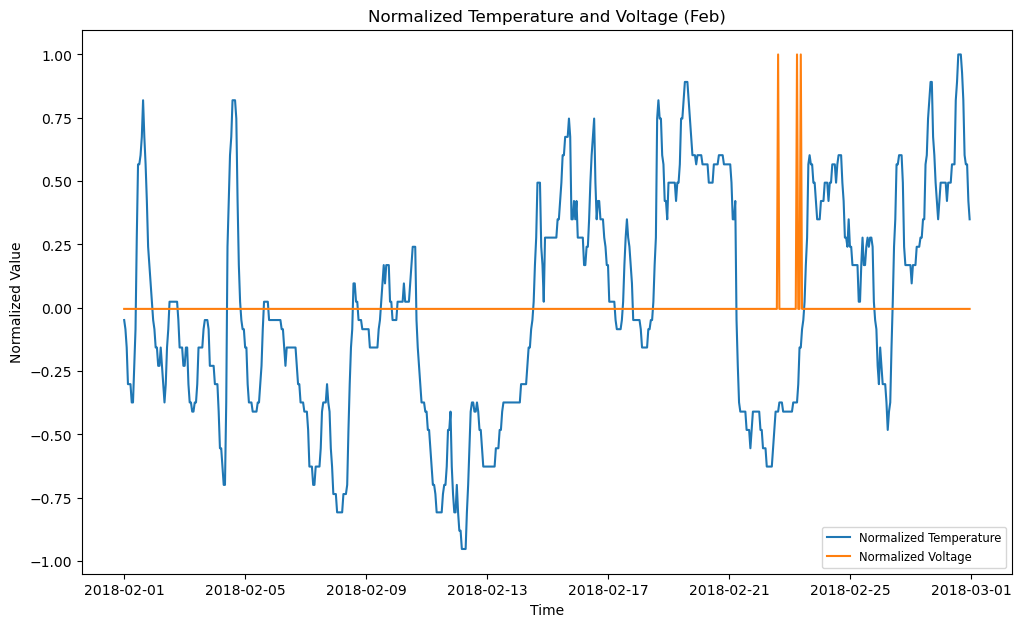

In [ ]:
import matplotlib.pyplot as plt

# Extract the 'Date', 'Time', and 'Temperature Average' columns
date = c_temp_2018_df['Date']
time = c_temp_2018_df['Time']

# Convert Korean time to 24-hour format
time = time.str.replace('오후', 'PM').str.replace('오전', 'AM')

# Combine 'Date' and 'Time' columns into a single datetime column
datetime = pd.to_datetime(date + ' ' + time, format='%Y-%m-%d %p %I:%M:%S')

temp_KBAZ = c_temp_2018_df['KBAZ']
pu_voltage = voltage_2018_df['110099 PU Volt']

# Filter the data for a specific month (February)
desired_month = 2
filtered_datetime = datetime[datetime.dt.month == desired_month]
filtered_pu_voltage = pu_voltage[datetime.dt.month == desired_month]
filtered_temp_KBAZ = temp_KBAZ[datetime.dt.month == desired_month]

# Filter out non-numeric values ('No Value')
filtered_pu_voltage = filtered_pu_voltage.replace('No Value', 1)
filtered_temp_KBAZ = filtered_temp_KBAZ.replace('No Value', 1)

# Convert the data to float type
filtered_pu_voltage = filtered_pu_voltage.astype(float)
filtered_temp_KBAZ = filtered_temp_KBAZ.astype(float)

# Normalize the data
# normalized_pu_voltage = (filtered_pu_voltage - np.mean(filtered_pu_voltage))
# normalized_pu_voltage = normalized_pu_voltage / (max(abs(normalized_pu_voltage)))

# normalized_temp_KBAZ = (filtered_temp_KBAZ - np.mean(filtered_temp_KBAZ))
# normalized_temp_KBAZ = normalized_temp_KBAZ / (max(abs(normalized_temp_KBAZ)))


fig, ax = plt.subplots(figsize=(12, 8))
fig.subplots_adjust(bottom=0.2)  # Increase the bottom margin for better x-axis labels

# Plot the normalized temperature
# ax.plot(filtered_datetime, normalized_temp_KBAZ, label='Normalized Temperature')

# Plot the normalized voltage
ax.plot(filtered_datetime, normalized_pu_voltage, label='Voltage')

# Set the labels and title
ax.set_xlabel('Time')
ax.set_ylabel('Normalized Value')
ax.set_title('Normalized Temperature and Voltage (Feb)')

# Display the legend
ax.legend(loc='lower right', fontsize='small')

# Show the plot
plt.show()

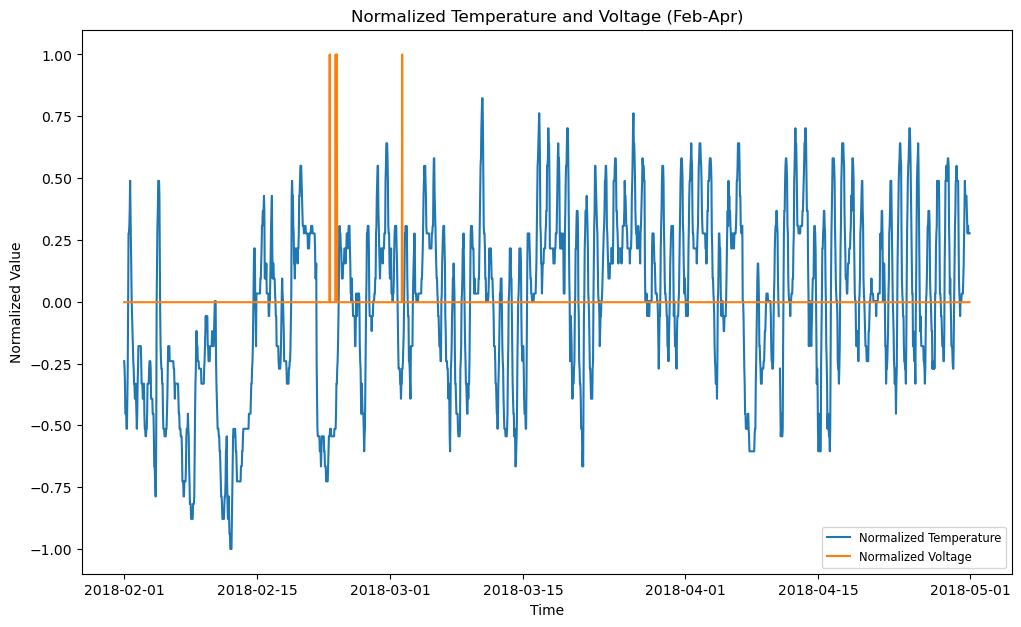

In [ ]:

# Extract the 'Date', 'Time', and 'Temperature Average' columns
date = c_temp_2018_df['Date']
time = c_temp_2018_df['Time']

# Convert Korean time to 24-hour format
time = time.str.replace('오후', 'PM').str.replace('오전', 'AM')

# Combine 'Date' and 'Time' columns into a single datetime column
datetime = pd.to_datetime(date + ' ' + time, format='%Y-%m-%d %p %I:%M:%S')

temp_KBAZ = c_temp_2018_df['KBAZ']
pu_voltage = voltage_2018_df['270225 PU Volt']

# Filter the data for three specific months (February, March, April)
desired_months = [2, 3, 4]
filtered_datetime = datetime[datetime.dt.month.isin(desired_months)]
filtered_pu_voltage = pu_voltage[datetime.dt.month.isin(desired_months)]
filtered_temp_KBAZ = temp_KBAZ[datetime.dt.month.isin(desired_months)]

# Filter out non-numeric values ('No Value')
# Filter out non-numeric values ('No Value')
filtered_pu_voltage = filtered_pu_voltage.replace('No Value', np.nan)
filtered_temp_KBAZ = filtered_temp_KBAZ.replace('No Value', np.nan)

# Convert the data to float type
filtered_pu_voltage = filtered_pu_voltage.astype(float)
filtered_temp_KBAZ = filtered_temp_KBAZ.astype(float)

# Normalize the data
normalized_pu_voltage = (filtered_pu_voltage - np.mean(filtered_pu_voltage))
normalized_pu_voltage = normalized_pu_voltage / (max(abs(normalized_pu_voltage)))

normalized_temp_KBAZ = (filtered_temp_KBAZ - np.mean(filtered_temp_KBAZ))
normalized_temp_KBAZ = normalized_temp_KBAZ / (max(abs(normalized_temp_KBAZ)))


fig, ax = plt.subplots(figsize=(12, 8))
fig.subplots_adjust(bottom=0.2)  # Increase the bottom margin for better x-axis labels

# Plot the normalized temperature
ax.plot(filtered_datetime, normalized_temp_KBAZ, label='Normalized Temperature')

# Plot the normalized voltage
ax.plot(filtered_datetime, normalized_pu_voltage, label='Normalized Voltage')

# Set the labels and title
ax.set_xlabel('Time')
ax.set_ylabel('Normalized Value')
ax.set_title('Normalized Temperature and Voltage (Feb-Apr)')

# Display the legend
ax.legend(loc='lower right', fontsize='small')

# Show the plot
plt.show()


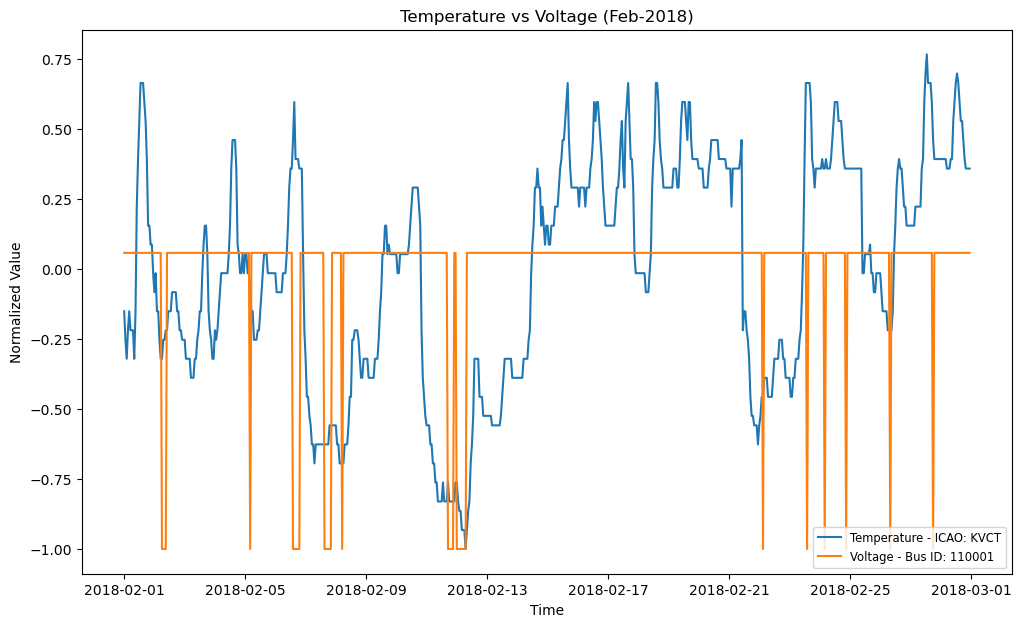

In [ ]:
# Extract the 'Date', 'Time', and 'Temperature Average' columns
date = c_temp_2018_df['Date']
time = c_temp_2018_df['Time']

# Convert Korean time to 24-hour format
time = time.str.replace('오후', 'PM').str.replace('오전', 'AM')

# Combine 'Date' and 'Time' columns into a single datetime column
datetime = pd.to_datetime(date + ' ' + time, format='%Y-%m-%d %p %I:%M:%S')

temp_KVCT = c_temp_2018_df['KVCT']
pu_voltage = voltage_2018_df['110001 PU Volt']

# Filter the data for a specific month (February)
desired_month = 2
filtered_datetime = datetime[datetime.dt.month == desired_month]
filtered_pu_voltage = pu_voltage[datetime.dt.month == desired_month]
filtered_temp_KVCT = temp_KVCT[datetime.dt.month == desired_month]

# Filter out non-numeric values ('No Value')
filtered_pu_voltage = filtered_pu_voltage.replace('No Value', np.nan)
filtered_temp_KVCT = filtered_temp_KVCT.replace('No Value', np.nan)

# Convert the data to float type
filtered_pu_voltage = filtered_pu_voltage.astype(float)
filtered_temp_KVCT = filtered_temp_KVCT.astype(float)

# Normalize the data
normalized_pu_voltage = (filtered_pu_voltage - np.mean(filtered_pu_voltage))
normalized_pu_voltage = normalized_pu_voltage / (max(abs(normalized_pu_voltage)))

normalized_temp_KVCT = (filtered_temp_KVCT- np.mean(filtered_temp_KVCT))
normalized_temp_KVCT = normalized_temp_KVCT / (max(abs(normalized_temp_KVCT)))


fig, ax = plt.subplots(figsize=(12, 8))
fig.subplots_adjust(bottom=0.2)  # Increase the bottom margin for better x-axis labels

# Plot the normalized temperature
ax.plot(filtered_datetime, normalized_temp_KVCT, label='Temperature - ICAO: KVCT')

# Plot the normalized voltage
ax.plot(filtered_datetime, normalized_pu_voltage, label='Voltage - Bus ID: 110001')

# Set the labels and title
ax.set_xlabel('Time')
ax.set_ylabel('Normalized Value')
ax.set_title('Temperature vs Voltage (Feb-2018)')

# Display the legend
ax.legend(loc='lower right', fontsize='small')

# Show the plot
plt.show()

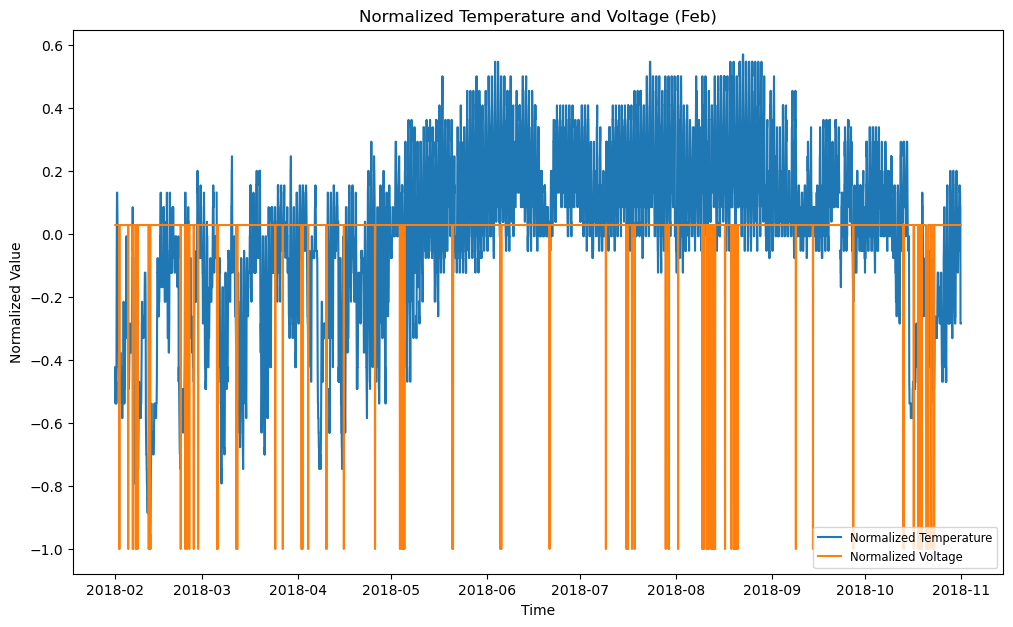

In [ ]:
# Extract the 'Date', 'Time', and 'Temperature Average' columns
date = c_temp_2018_df['Date']
time = c_temp_2018_df['Time']

# Convert Korean time to 24-hour format
time = time.str.replace('오후', 'PM').str.replace('오전', 'AM')

# Combine 'Date' and 'Time' columns into a single datetime column
datetime = pd.to_datetime(date + ' ' + time, format='%Y-%m-%d %p %I:%M:%S')

temp_KVCT = c_temp_2018_df['KVCT']
pu_voltage = voltage_2018_df['110001 PU Volt']

# Filter the data for three specific months (February, March, April)
desired_months = [2, 3, 4, 5, 6, 7, 8, 9, 10]
filtered_datetime = datetime[datetime.dt.month.isin(desired_months)]
filtered_pu_voltage = pu_voltage[datetime.dt.month.isin(desired_months)]
filtered_temp_KVCT = temp_KVCT [datetime.dt.month.isin(desired_months)]

# Filter out non-numeric values ('No Value')
filtered_pu_voltage = filtered_pu_voltage.replace('No Value', np.nan)
filtered_temp_KVCT = filtered_temp_KVCT.replace('No Value', np.nan)

# Convert the data to float type
filtered_pu_voltage = filtered_pu_voltage.astype(float)
filtered_temp_KVCT = filtered_temp_KVCT.astype(float)

# Normalize the data
normalized_pu_voltage = (filtered_pu_voltage - np.mean(filtered_pu_voltage))
normalized_pu_voltage = normalized_pu_voltage / (max(abs(normalized_pu_voltage)))

normalized_temp_KVCT = (filtered_temp_KVCT- np.mean(filtered_temp_KVCT))
normalized_temp_KVCT = normalized_temp_KVCT / (max(abs(normalized_temp_KVCT)))


fig, ax = plt.subplots(figsize=(12, 8))
fig.subplots_adjust(bottom=0.2)  # Increase the bottom margin for better x-axis labels

# Plot the normalized temperature
ax.plot(filtered_datetime, normalized_temp_KVCT, label='Normalized Temperature')

# Plot the normalized voltage
ax.plot(filtered_datetime, normalized_pu_voltage, label='Normalized Voltage')

# Set the labels and title
ax.set_xlabel('Time')
ax.set_ylabel('Normalized Value')
ax.set_title('Normalized Temperature and Voltage (Feb)')

# Display the legend
ax.legend(loc='lower right', fontsize='small')

# Show the plot
plt.show()

In [ ]:
voltage_2018_df['110001 PU Volt'].value_counts()

110001 PU Volt
1.06    8450
1.05     310
Name: count, dtype: int64

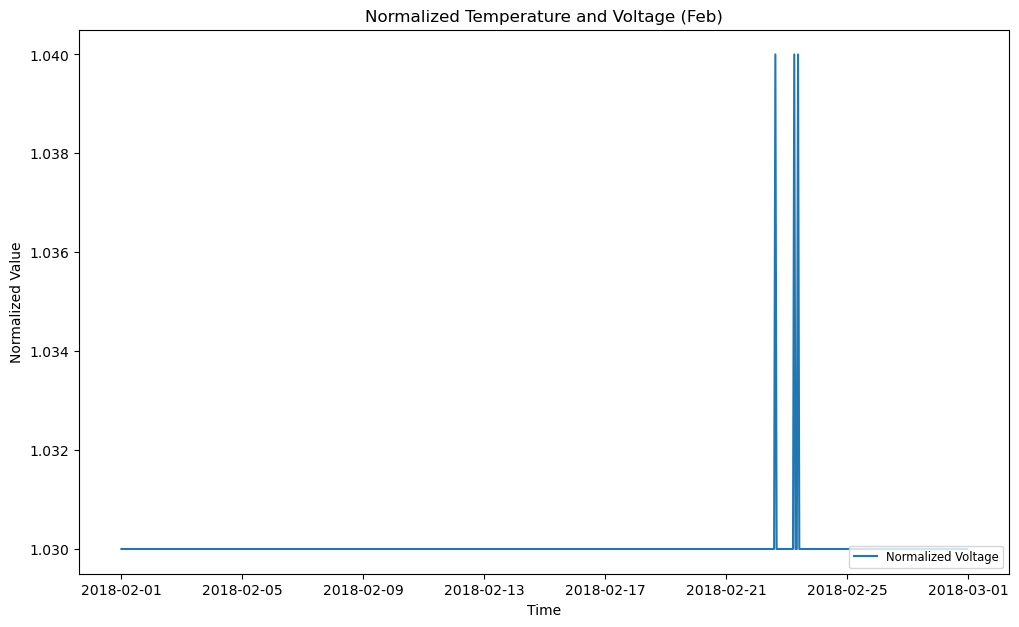

In [ ]:
# Extract the 'Date', 'Time', and 'Temperature Average' columns
date = c_temp_2018_df['Date']
time = c_temp_2018_df['Time']

# Convert Korean time to 24-hour format
time = time.str.replace('오후', 'PM').str.replace('오전', 'AM')

# Combine 'Date' and 'Time' columns into a single datetime column
datetime = pd.to_datetime(date + ' ' + time, format='%Y-%m-%d %p %I:%M:%S')


pu_voltage = voltage_2018_df['270225 PU Volt']

# Filter the data for a specific month (February)
desired_month = 2
filtered_datetime = datetime[datetime.dt.month == desired_month]
filtered_pu_voltage = pu_voltage[datetime.dt.month == desired_month]

# Filter out non-numeric values ('No Value')
filtered_pu_voltage = filtered_pu_voltage.replace('No Value', np.nan)

# Convert the data to float type
filtered_pu_voltage = filtered_pu_voltage.astype(float)

# Normalize the data
# normalized_pu_voltage = (filtered_pu_voltage - np.mean(filtered_pu_voltage))
# normalized_pu_voltage = normalized_pu_voltage / (max(abs(normalized_pu_voltage)))


fig, ax = plt.subplots(figsize=(12, 8))
fig.subplots_adjust(bottom=0.2)  # Increase the bottom margin for better x-axis labels


# Plot the normalized voltage
ax.plot(filtered_datetime, filtered_pu_voltage, label='Normalized Voltage')

# Set the labels and title
ax.set_xlabel('Time')
ax.set_ylabel('Normalized Value')
ax.set_title('Normalized Temperature and Voltage (Feb)')

# Display the legend
ax.legend(loc='lower right', fontsize='small')

# Show the plot
plt.show()

In [ ]:
print(filtered_pu_voltage)

750     1.03
751     1.03
752     1.03
753     1.03
754     1.03
        ... 
1417    1.03
1418    1.03
1419    1.03
1420    1.03
1421    1.03
Name: 270225 PU Volt, Length: 672, dtype: float64


In [ ]:
voltage_2018_df['270225 PU Volt'].value_counts()

270225 PU Volt
1.03    8689
1.02      52
1.04      19
Name: count, dtype: int64

In [ ]:
voltage_2018_df.iloc[1000].value_counts().sort_values()

1000
2/11/2018         1
10:00:00 AM       1
NO                1
0.99              1
1.0               3
1.01              8
1.11             17
1.08            154
1.1             158
1.09            199
1.02            219
1.07            274
1.06            850
1.05           1157
1.03           1627
1.04           2050
Name: count, dtype: int64